<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Tarea5/Lennar_jonnes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generación 1, Mejor energía: -4.633813714757893
Generación 2, Mejor energía: -13.053772870737777
Generación 3, Mejor energía: 10.703707405171254
Generación 4, Mejor energía: 3860.9721971714266
Generación 5, Mejor energía: 13341.495616297887
Generación 6, Mejor energía: 71381.3676813589
Generación 7, Mejor energía: 169218.76716136798
Generación 8, Mejor energía: 299418.53546467767
Generación 9, Mejor energía: 398314.4530292444
Generación 10, Mejor energía: 2441294.0158802904
Generación 11, Mejor energía: 1896565.4480454908
Generación 12, Mejor energía: 3623780.2186945574
Generación 13, Mejor energía: 4322123.453114517
Generación 14, Mejor energía: 2597237.4347166037
Generación 15, Mejor energía: 572877.5971606154
Generación 16, Mejor energía: 469785.8136910906
Generación 17, Mejor energía: 599689.0590344971
Generación 18, Mejor energía: 491513.18878229643
Generación 19, Mejor energía: 281625.64791787864
Generación 20, Mejor energía: 247954.62704571427
Generación 21, Mejor energía: 28160

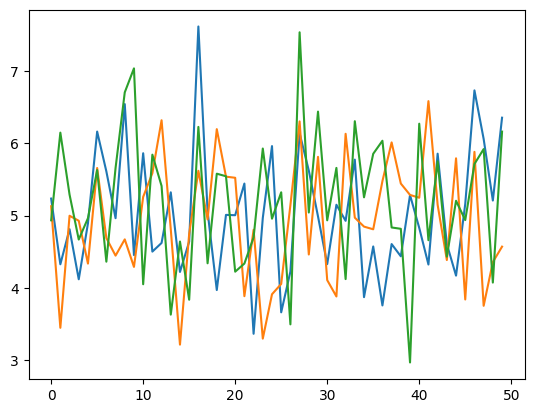

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Definición del potencial de Lennard-Jones
def LennardJones(r, epsilon=1, sigma=1):
    """
    Potencial de Lennard-Jones para dos partículas a una distancia r.
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

# Función de energía total
def TotalEnergy(positions, epsilon=1, sigma=1):
    """
    Calcula la energía total de un sistema de partículas en posiciones dadas.
    """
    N = len(positions)
    energy = 0
    for i in range(N):
        for j in range(i + 1, N):
            r = np.linalg.norm(positions[i] - positions[j])  # Distancia entre partículas
            if r != 0:
                energy += LennardJones(r, epsilon, sigma)
    return energy

# Inicialización de la población
def initialize_population(pop_size, num_particles, space_bounds):
    return np.random.uniform(low=space_bounds[0], high=space_bounds[1], size=(pop_size, num_particles, 3))

# Selección por torneo
def tournament_selection(population, fitness, k=3):
    selected = []
    for _ in range(len(population)):
        participants = np.random.choice(len(population), k)
        best = participants[np.argmin(fitness[participants])]
        selected.append(population[best])
    return np.array(selected)

# Cruce de dos padres
def crossover(parent1, parent2):
    alpha = np.random.uniform(0, 1, size=parent1.shape)
    return alpha * parent1 + (1 - alpha) * parent2

# Mutación de un individuo
def mutate(individual, mutation_rate, space_bounds):
    if np.random.rand() < mutation_rate:
        mutation = np.random.uniform(-0.1, 0.1, size=individual.shape)
        individual += mutation
        # Asegurarse de que las posiciones se mantengan dentro de los límites
        individual = np.clip(individual, space_bounds[0], space_bounds[1])
    return individual

# Algoritmo genético
def genetic_algorithm(pop_size, num_particles, space_bounds, generations, mutation_rate):
    # Inicializar la población
    population = initialize_population(pop_size, num_particles, space_bounds)

    # Iterar a través de generaciones
    for generation in range(generations):
        # Calcular la energía total para cada individuo
        fitness = np.array([TotalEnergy(individual) for individual in population])

        # Selección
        selected_population = tournament_selection(population, fitness)

        # Cruce y creación de la nueva población
        new_population = []
        for i in range(0, pop_size, 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1]
            child1 = crossover(parent1, parent2)
            child2 = crossover(parent2, parent1)
            new_population.append(mutate(child1, mutation_rate, space_bounds))
            new_population.append(mutate(child2, mutation_rate, space_bounds))

        population = np.array(new_population)

        # Obtener el mejor individuo
        best_fitness = np.min(fitness)
        best_individual = population[np.argmin(fitness)]

        print(f'Generación {generation + 1}, Mejor energía: {best_fitness}')

    return best_individual, best_fitness

# Parámetros del algoritmo
pop_size = 100
num_particles = 50
space_bounds = [0, 10]  # Límites de las posiciones de las partículas en cada dimensión
generations = 100
mutation_rate = 0.1

# Ejecutar el algoritmo genético
best_solution, best_energy = genetic_algorithm(pop_size, num_particles, space_bounds, generations, mutation_rate)
print(f'Mejor solución encontrada: {best_solution}')
print(f'Energía total: {best_energy}')
plt.plot(best_solution)
plt.show()